In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ktrain


  Using cached ktrain-0.37.6-py3-none-any.whl
  Using cached cchardet-2.1.7.tar.gz (653 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tika-2.6.0-py3-none-any.whl
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached syntok-1.4.4-py3-none-any.whl (24 kB)
  Using cached langdetect-1.0.9-py3-none-any.whl
  Using cached keras_bert-0.89.0-py3-none-any.whl
  Using cached keras_transformer-0.40.0-py3-none-any.whl
  Using cached keras_multi_head-0.29.0-py3-none-any.whl
  Using cached keras_embed_sim-0.10.0-py3-none-any.whl
  Using cached keras_position_wise_feed_forward-0.8.0-py3-none-any.whl
  Using cached keras_layer_normalization-0.16.0-py3-none-any.whl
  Using cached keras_pos_embd-0.13.0-py3-none-any.whl
  Using cached keras_self_attention-0.51.0-py3-none-any.whl
  Running setup.py clean for cchardet
Failed to build cchardet
  Running setup.py install for cchardet: started
  Running setup.py ins

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [11 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\cchardet
  copying src\cchardet\version.py -> build\lib.win-amd64-cpython-310\cchardet
  copying src\cchardet\__init__.py -> build\lib.win-amd64-cpython-310\cchardet
  running build_ext
  building 'cchardet._cchardet' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cchardet
  error: subprocess-exited-with-error
  
  Running setup.py install for cchardet did not run successfully.
  exit code: 1
  
  [13 lines of output]
  running insta

In [3]:
#general purpose packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

seed=42

#transfromers
from transformers import BertTokenizerFast
from transformers import TFBertModel

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))# Load libraries
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
...

Python: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
scipy: 1.10.0
numpy: 1.23.5
matplotlib: 3.7.0
pandas: 1.5.3
sklearn: 1.2.1


Ellipsis

In [66]:
df = pd.read_csv("labeled_data.csv")
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [67]:
# Open the text file
with open('off.txt', 'r') as file:
    # Read the file contents and split into lines
    lines = file.readlines()

# Remove any leading or trailing whitespace from each line
lines = [line.strip() for line in lines]

# Split each line by comma and flatten the list
words = [word.strip() for line in lines for word in line.split(',')]

# Remove empty strings if needed
words = list(filter(None, words))


In [68]:
words


['abbo',
 'abo',
 'abortion',
 'abuse',
 'addict',
 'addicts',
 'adult',
 'africa',
 'african',
 'alla',
 'allah',
 'alligatorbait',
 'amateur',
 'american',
 'anal',
 'analannie',
 'analsex',
 'angie',
 'angry',
 'anus',
 'arab',
 'arabs',
 'areola',
 'argie',
 'aroused',
 'arse',
 'arsehole',
 'asian',
 'ass',
 'assassin',
 'assassinate',
 'assassination',
 'assault',
 'assbagger',
 'assblaster',
 'assclown',
 'asscowboy',
 'asses',
 'assfuck',
 'assfucker',
 'asshat',
 'asshole',
 'assholes',
 'asshore',
 'assjockey',
 'asskiss',
 'asskisser',
 'assklown',
 'asslick',
 'asslicker',
 'asslover',
 'assman',
 'assmonkey',
 'assmunch',
 'assmuncher',
 'asspacker',
 'asspirate',
 'asspuppies',
 'assranger',
 'asswhore',
 'asswipe',
 'athletesfoot',
 'attack',
 'australian',
 'babe',
 'babies',
 'backdoor',
 'backdoorman',
 'backseat',
 'badfuck',
 'balllicker',
 'balls',
 'ballsack',
 'banging',
 'baptist',
 'barelylegal',
 'barf',
 'barface',
 'barfface',
 'bast',
 'bastard',
 'bazongas

In [69]:
def count_words(tweet):
    count = 0
    for word in words:
        if word in tweet:
            count += 1
    return count


In [70]:
df['word_count'] = df['tweet'].apply(count_words)


In [71]:
df


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,word_count
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,2
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,8
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,6
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",1
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,7
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,5


In [72]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [73]:
data=df
data.drop(['count'], axis=1,inplace=True)

C:\Users\ASUSV\AppData\Local\Temp\ipykernel_4800\1726318895.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax, rwidth=0.8)


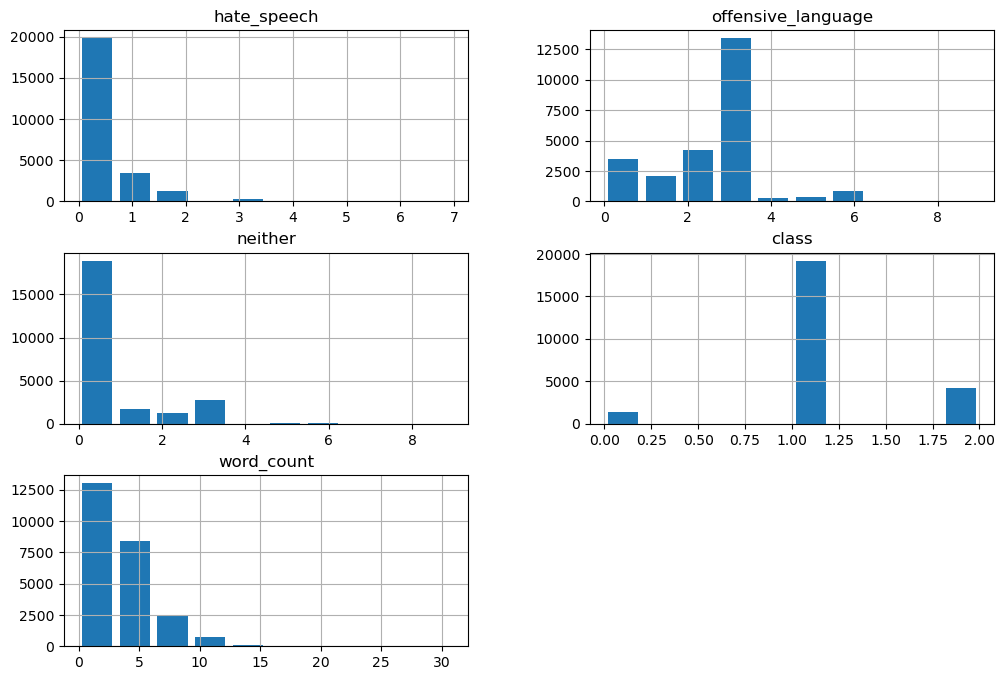

In [74]:
fig, ax = plt.subplots(figsize=(12, 8), gridspec_kw={'left': 0.1, 'right': 0.9, 'top': 0.9, 'bottom': 0.1})

# Plot the histogram with added space between bars
data.hist(ax=ax, rwidth=0.8)
pyplot.show()

In [75]:
import nltk

In [76]:
TEXT_CLEANING_RE = "!@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [77]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUSV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:


import string
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [79]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?/].','',text)
    text=re.sub('https?://\S+|www.\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ')if word not in stop_words]
    text=" ".join(text)
    return text
df['tweet']=df['tweet'].apply(clean)
df
  

,hate_speech,offensive_language,neither,class,tweet,word_count
0,0,0,3,2,rt mayasolovely woman shouldnt complain clean...,2
1,0,3,0,1,rt boy dats coldtyga dwn bad cuffin dat hoe ...,2
2,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch sta...,8
3,0,2,1,1,rt cganderson vivabased look like tranny,1
4,0,6,0,1,rt shenikaroberts shit hear might true might ...,6
...,...,...,...,...,...,...
24778,0,2,1,1,yous muthafin lie coreyemanuel right tl tras...,0
24779,0,1,2,2,youve gone broke wrong heart baby drove rednec...,1
24780,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...,7
24781,0,6,0,1,youu got wild bitches tellin lies,5


In [80]:
class_mapping = {
    1: 1,  # Positive class
    2: 1,  # Negative class
    0: 0,  # Negative class
    # Add more class mappings as needed
}
df['binary_label'] = df['class'].map(class_mapping)

In [81]:
df


,hate_speech,offensive_language,neither,class,tweet,word_count,binary_label
0,0,0,3,2,rt mayasolovely woman shouldnt complain clean...,2,1
1,0,3,0,1,rt boy dats coldtyga dwn bad cuffin dat hoe ...,2,1
2,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch sta...,8,1
3,0,2,1,1,rt cganderson vivabased look like tranny,1,1
4,0,6,0,1,rt shenikaroberts shit hear might true might ...,6,1
...,...,...,...,...,...,...,...
24778,0,2,1,1,yous muthafin lie coreyemanuel right tl tras...,0,1
24779,0,1,2,2,youve gone broke wrong heart baby drove rednec...,1,1
24780,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...,7,1
24781,0,6,0,1,youu got wild bitches tellin lies,5,1


In [82]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))# Load libraries
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
...

Python: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
scipy: 1.10.0
numpy: 1.23.5
matplotlib: 3.7.0
pandas: 1.5.3
sklearn: 1.2.1


Ellipsis

In [83]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Count Features Binary 

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
KFold
# Prepare the feature matrix (X) and the target variable (y)
X = df[['word_count']] # Exclude 'class' and 'tweet' columns
y = df['binary_label']  # Assuming 'class' column contains the target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import time
# store starting time
begin = time.time()
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier(learning_rate = 1)))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	model.fit(X_train, y_train)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
	y_pred = model.predict(X_test)
	report = classification_report(y_test, y_pred)
	print(report)
end = time.time()



LR: 0.942499 (0.005437)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.94      1.00      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.47      0.50      0.48      4957
weighted avg       0.89      0.94      0.91      4957



C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN: 0.936749 (0.010614)
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       290
           1       0.94      1.00      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.64      0.50      0.49      4957
weighted avg       0.91      0.94      0.91      4957

CART: 0.942398 (0.005501)
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       290
           1       0.94      1.00      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.64      0.50      0.49      4957
weighted avg       0.91      0.94      0.91      4957

RF: 0.942398 (0.005501)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.94      1.00      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.47      0.50      0.48      4957

C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: 0.942398 (0.005501)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.94      1.00      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.47      0.50      0.48      4957
weighted avg       0.89      0.94      0.91      4957



C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM: 0.942499 (0.005437)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.94      1.00      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.47      0.50      0.48      4957
weighted avg       0.89      0.94      0.91      4957



C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Count Features MultiClass 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
KFold
# Prepare the feature matrix (X) and the target variable (y)
X = df[['word_count']] # Exclude 'class' and 'tweet' columns
y = df['class']  # Assuming 'class' column contains the target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import time
# store starting time
begin = time.time()
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier(learning_rate = 1)))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	model.fit(X_train, y_train)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
	y_pred = model.predict(X_test)
	report = classification_report(y_test, y_pred)
	print(report)
end = time.time()
 

LR: 0.818622 (0.006712)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.81      0.99      0.89      3832
           2       0.83      0.31      0.45       835

    accuracy                           0.82      4957
   macro avg       0.55      0.43      0.45      4957
weighted avg       0.77      0.82      0.77      4957



C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN: 0.800315 (0.043175)
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       290
           1       0.81      0.99      0.89      3832
           2       0.83      0.31      0.45       835

    accuracy                           0.81      4957
   macro avg       0.66      0.43      0.45      4957
weighted avg       0.79      0.81      0.77      4957

CART: 0.821649 (0.007987)
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       290
           1       0.86      0.91      0.89      3832
           2       0.59      0.63      0.61       835

    accuracy                           0.81      4957
   macro avg       0.60      0.52      0.50      4957
weighted avg       0.79      0.81      0.79      4957

RF: 0.821649 (0.007987)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.86      0.91      0.89      3832


C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: 0.821749 (0.007856)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.86      0.91      0.89      3832
           2       0.59      0.63      0.61       835

    accuracy                           0.81      4957
   macro avg       0.48      0.51      0.50      4957
weighted avg       0.77      0.81      0.79      4957



C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM: 0.821749 (0.007856)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.86      0.91      0.89      3832
           2       0.59      0.63      0.61       835

    accuracy                           0.81      4957
   macro avg       0.48      0.51      0.50      4957
weighted avg       0.77      0.81      0.79      4957



C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
X=np.array(df['tweet'])
y=np.array(df['class'])


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)
y.shape


(24783,)

In [28]:
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix
df.dropna(inplace=True)
X_test = df['tweet'].values
y_test = df['binary_label'].values
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
Y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1))
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1))
Y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1))
from sklearn.feature_extraction.text import TfidfVectorizer
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
KFold

clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)
X_valid_cv = clf.transform(X_valid)


tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_valid_tf = tf_transformer.transform(X_valid_cv)
X_test_tf=tf_transformer.transform(X_test_cv)
X_dense_train = X_train_tf.toarray()
X_dense_test=X_test_tf.toarray()

y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [30]:
import time
# store starting time
begin = time.time()
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier(learning_rate = 1)))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	model.fit(X_train_tf, y_train_le)
	cv_results = cross_val_score(model, X_train_tf, y_train_le, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
	y_pred = model.predict(X_test_tf)
	report = classification_report(y_test_le, y_pred)
	print(report)
end = time.time()
# total time taken

print(f"Total runtime : {end - begin}")

LR: 0.882622 (0.006481)
              precision    recall  f1-score   support

           0       0.86      0.20      0.33      1430
           1       0.95      0.83      0.89     23353
           2       0.00      0.00      0.00         0

    accuracy                           0.80     24783
   macro avg       0.60      0.34      0.40     24783
weighted avg       0.94      0.80      0.85     24783



C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN: 0.780084 (0.012899)


C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      0.31      0.43      1430
           1       0.96      0.98      0.97     23353
           2       0.00      0.00      0.00         0

    accuracy                           0.94     24783
   macro avg       0.54      0.43      0.47     24783
weighted avg       0.94      0.94      0.94     24783

CART: 0.872669 (0.004725)
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1430
           1       1.00      0.82      0.90     23353
           2       0.00      0.00      0.00         0

    accuracy                           0.83     24783
   macro avg       0.64      0.58      0.61     24783
weighted avg       0.99      0.83      0.90     24783



C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF: 0.887464 (0.004377)


C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      0.91      0.94      1430
           1       0.99      0.82      0.90     23353
           2       0.00      0.00      0.00         0

    accuracy                           0.83     24783
   macro avg       0.66      0.58      0.62     24783
weighted avg       0.99      0.83      0.90     24783

AdaBoost: 0.876256 (0.006210)


C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.18      0.27      1430
           1       0.95      0.76      0.85     23353
           2       0.00      0.00      0.00         0

    accuracy                           0.73     24783
   macro avg       0.51      0.31      0.37     24783
weighted avg       0.93      0.73      0.81     24783

SVM: 0.774301 (0.009277)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1430
           1       0.94      1.00      0.97     23353

    accuracy                           0.94     24783
   macro avg       0.47      0.50      0.49     24783
weighted avg       0.89      0.94      0.91     24783

Total runtime : 2303.7867798805237


C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import re

# Load the dataset
df1= pd.read_csv('labeled_data.csv')

# Remove non-alphanumeric characters and split into words
df1['tweet'] = df1['tweet'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
df1['tweet'] = df1['tweet'].apply(lambda x: x.split())

# Prepare the feature matrix (X) and the target variable (y)
X = df1['tweet'].apply(lambda x: ' '.join(x))  # Convert the list of words back to text
y = df['binary_label']  # Assuming 'class' column contains the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract n-grams features using CountVectorizer
ngram_range = (1, 3)
vectorizer = CountVectorizer(ngram_range=ngram_range)
X_train_ngrams = vectorizer.fit_transform(X_train)
X_test_ngrams = vectorizer.transform(X_test)

# Train a machine learning model
begin = time.time()
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier(learning_rate = 1)))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	model.fit(X_train_ngrams, y_train)
	cv_results = cross_val_score(model, X_train_ngrams, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
	y_pred = model.predict(X_test_ngrams)
	report = classification_report(y_test, y_pred)
	print(report)
end = time.time()


LR: 0.946181 (0.005573)
              precision    recall  f1-score   support

           0       0.53      0.14      0.22       290
           1       0.95      0.99      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.74      0.57      0.59      4957
weighted avg       0.92      0.94      0.93      4957

KNN: 0.934127 (0.005643)
              precision    recall  f1-score   support

           0       0.41      0.24      0.31       290
           1       0.95      0.98      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.68      0.61      0.64      4957
weighted avg       0.92      0.94      0.93      4957

CART: 0.930899 (0.005800)
              precision    recall  f1-score   support

           0       0.41      0.30      0.34       290
           1       0.96      0.97      0.97      4667

    accuracy                           0.93      4957
   macro avg       0.68      0.63      0.65      4957

C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
y_pred = model.predict(X_test_ngrams)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.41      0.22      0.29       290
           1       0.95      0.98      0.97      4667

    accuracy                           0.94      4957
   macro avg       0.68      0.60      0.63      4957
weighted avg       0.92      0.94      0.93      4957



In [31]:
df.dropna(inplace=True)
X_test = df['tweet'].values
y_test = df['class'].values
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
Y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1))
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1))
Y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1))
from sklearn.feature_extraction.text import TfidfVectorizer
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
KFold

clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)
X_valid_cv = clf.transform(X_valid)


tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_valid_tf = tf_transformer.transform(X_valid_cv)
X_test_tf=tf_transformer.transform(X_test_cv)

y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['csr_matrix']

In [73]:
import time
# store starting time
begin = time.time()
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier(learning_rate = 1)))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	model.fit(X_train_tf, y_train_le)
	cv_results = cross_val_score(model, X_train_tf, y_train_le, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
	y_pred = model.predict(X_test_tf)
	report = classification_report(y_test_le, y_pred)
	print(report)
end = time.time()
# total time taken
print(f"Total runtime : {end - begin}")

LR: 0.882622 (0.006481)
              precision    recall  f1-score   support

           0       0.86      0.20      0.33      1430
           1       0.92      0.98      0.95     19190
           2       0.91      0.87      0.89      4163

    accuracy                           0.92     24783
   macro avg       0.90      0.69      0.72     24783
weighted avg       0.92      0.92      0.91     24783

KNN: 0.780084 (0.012899)
              precision    recall  f1-score   support

           0       0.67      0.31      0.43      1430
           1       0.80      0.99      0.89     19190
           2       0.89      0.06      0.11      4163

    accuracy                           0.80     24783
   macro avg       0.78      0.46      0.48     24783
weighted avg       0.81      0.80      0.73     24783

CART: 0.874597 (0.003683)
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1430
           1       0.99      0.99      0.99     19190


C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUSV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
KFold
# Load the dataset
dataset = pd.read_csv('labeled_data.csv')

# Remove non-alphanumeric characters and split into words
df['tweet'] = df['tweet'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
df['tweet'] = df['tweet'].apply(lambda x: x.split())

# Prepare the feature matrix (X) and the target variable (y)
X = df['tweet'].apply(lambda x: ' '.join(x))  # Convert the list of words back to text
y = df['class']  # Assuming 'class' column contains the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract n-grams features using CountVectorizer
ngram_range = (1, 3)
vectorizer = CountVectorizer(ngram_range=ngram_range)
X_train_ngrams = vectorizer.fit_transform(X_train)
X_test_ngrams = vectorizer.transform(X_test)
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier(learning_rate = 1)))
models.append(('SVM', SVC(gamma='auto')))


results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	model.fit(X_train_ngrams, y_train)
	cv_results = cross_val_score(model, X_train_ngrams, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
	y_pred = model.predict(X_test_ngrams)
	report = classification_report(y_test, y_pred)
	print(report)

LR: 0.895944 (0.005532)
              precision    recall  f1-score   support

           0       0.54      0.21      0.31       290
           1       0.92      0.96      0.94      3832
           2       0.83      0.85      0.84       835

    accuracy                           0.90      4957
   macro avg       0.76      0.67      0.70      4957
weighted avg       0.88      0.90      0.89      4957

KNN: 0.763542 (0.011198)


MemoryError: Unable to allocate 750. MiB for an array with shape (4957, 19826) and data type float64